In [1]:
#se importa las dependencias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import metrics
from scipy.stats import norm
import statistics

import statsmodels.api as sm
from statsmodels.tools import eval_measures

In [2]:
#se trae el data set
properatti_df_bsas=pd.read_csv("./tp2_properati_no_input.csv", sep=",", encoding='utf-8')
properatti_df_bsas.sample(5)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
28184,109738,Villa Urquiza,NaN,NaN,2.0,120000.000000,120000.00,True,False,True,False,True,False,True,False,False,False,False
16419,62143,Recoleta,2428.571429,35.0,1.0,85000.000000,85000.00,False,False,False,False,False,False,False,False,False,False,False
25391,94126,Villa Urquiza,2804.183833,60.0,2.0,170024.654299,168251.03,True,True,True,True,True,False,False,False,False,False,True
366,1499,NaN,NaN,NaN,NaN,165000.000000,165000.00,True,True,False,False,True,False,False,False,False,False,True
15002,57730,Monserrat,2054.794521,292.0,NaN,600000.000000,600000.00,False,False,False,False,False,False,False,False,False,False,False


In [3]:
lista=[]
for col in properatti_df_bsas.columns:
    lista.append(col)
print(lista)

['Unnamed: 0', 'barrio', 'price_usd_per_m2', 'surface_total_clean', 'rooms_clean', 'precios_nuevos', 'precios_aprox_usd_clean', 'amenities', 'estacionamiento', 'sum', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']


In [4]:
properatti_df_bsas=properatti_df_bsas*1
properatti_df_bsas.sample(5)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
9671,38109,Balvanera,NaN,NaN,3.0,129000.0,129000.0,0,0,0,0,0,0,0,0,0,0,1
9616,37930,Velez Sarsfield,1153.846154,260.0,4.0,300000.0,300000.0,1,0,0,1,0,0,0,0,0,1,1
29540,113599,Recoleta,2969.924812,133.0,4.0,395000.0,395000.0,1,0,0,0,0,0,1,0,0,0,0
28624,110829,Flores,1640.000000,50.0,3.0,82000.0,82000.0,0,0,0,0,0,0,0,0,0,0,1
31298,119681,Coghlan,NaN,NaN,3.0,125000.0,125000.0,1,0,0,0,0,0,1,0,0,1,0


In [5]:
properatti_df_bsas.shape

(31942, 18)

In [6]:
properatti_df_bsas.isna().sum()

Unnamed: 0                    0
barrio                     1294
price_usd_per_m2           8819
surface_total_clean        3912
rooms_clean                5901
precios_nuevos             2899
precios_aprox_usd_clean    2899
amenities                     0
estacionamiento               0
sum                           0
pileta                        0
parrilla                      0
gimnasio                      0
lavadero                      0
solarium                      0
quincho                       0
baulera                       0
terraza                       0
dtype: int64

In [7]:
llenado_nulos=properatti_df_bsas[properatti_df_bsas["price_usd_per_m2"].isnull()]
llenado_nulos.sample(4)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
25139,93218,Recoleta,NaN,100.0,2.0,370000.0,370000.0,1,1,0,0,1,0,1,0,0,0,1
1272,7070,Nunez,NaN,NaN,2.0,98000.0,98000.0,0,0,0,0,0,0,0,0,0,0,0
27720,106914,Caballito,NaN,NaN,NaN,300000.0,300000.0,1,1,0,0,0,0,1,0,0,1,0
2209,10348,Caballito,NaN,NaN,4.0,295000.0,295000.0,1,0,0,0,1,0,0,0,0,1,0


In [8]:
mask_precio=llenado_nulos[llenado_nulos["precios_nuevos"].notnull()]

In [9]:
mask_precio.head(4)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
2,3,Liniers,NaN,NaN,3.0,95000.00000,95000.00,0,0,0,0,0,0,0,0,0,0,1
24,97,San Telmo,NaN,NaN,1.0,80693.70093,79851.93,0,1,0,0,0,0,0,0,0,0,0
30,120,Belgrano,NaN,NaN,3.0,178000.00000,178000.00,1,1,0,0,0,0,1,0,0,0,0
32,137,Colegiales,NaN,133.0,6.0,249000.00000,249000.00,1,0,0,0,0,0,0,0,0,0,1


In [10]:
mask_precio.shape

(5920, 18)

In [11]:
nonulos=mask_precio[mask_precio["surface_total_clean"].notnull()]
nonulos.isna().sum()

Unnamed: 0                    0
barrio                       33
price_usd_per_m2           2201
surface_total_clean           0
rooms_clean                 351
precios_nuevos                0
precios_aprox_usd_clean       0
amenities                     0
estacionamiento               0
sum                           0
pileta                        0
parrilla                      0
gimnasio                      0
lavadero                      0
solarium                      0
quincho                       0
baulera                       0
terraza                       0
dtype: int64

In [12]:
precio_n_por_m2=nonulos["precios_nuevos"]/nonulos["surface_total_clean"]
print(precio_n_por_m2.sample(4))
print(precio_n_por_m2.shape[0])

374      3261.904762
16670    1071.428571
14898    2142.857143
11927    3095.238095
dtype: float64
2201


In [13]:
properatti_df_bsas["price_usd_per_m2"] = properatti_df_bsas["price_usd_per_m2"].fillna(precio_n_por_m2.iloc[:])

In [14]:
properatti_df_bsas.isna().sum()

Unnamed: 0                    0
barrio                     1294
price_usd_per_m2           6618
surface_total_clean        3912
rooms_clean                5901
precios_nuevos             2899
precios_aprox_usd_clean    2899
amenities                     0
estacionamiento               0
sum                           0
pileta                        0
parrilla                      0
gimnasio                      0
lavadero                      0
solarium                      0
quincho                       0
baulera                       0
terraza                       0
dtype: int64

In [15]:
properatti_df_bsas.iloc[15522,:]

Unnamed: 0                    59535
barrio                        Nunez
price_usd_per_m2                NaN
surface_total_clean             NaN
rooms_clean                     3.0
precios_nuevos             128000.0
precios_aprox_usd_clean    128000.0
amenities                         0
estacionamiento                   0
sum                               0
pileta                            0
parrilla                          0
gimnasio                          0
lavadero                          0
solarium                          0
quincho                           0
baulera                           0
terraza                           0
Name: 15522, dtype: object

In [16]:
#se llenaron 5819 campos de la columna price_usd_per_m2
#se elimina la columna precios_aprox_usd_clean por encontrarse repetida
properatti_df_bsas=properatti_df_bsas.drop(labels='precios_aprox_usd_clean', axis=1)

In [17]:
properatti_df_bsas.sample(4)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
24759,90990,NaN,1916.666667,60.0,3.0,115000.0,0,0,0,0,0,0,0,0,0,0,0
14246,55236,Paternal,1650.000000,60.0,2.0,99000.0,1,0,0,0,1,0,0,0,0,0,1
14969,57581,Palermo,NaN,NaN,NaN,6200000.0,1,1,0,1,1,0,1,0,0,0,0
26109,97299,Barrio Norte,NaN,NaN,4.0,225000.0,0,0,0,0,0,0,0,0,0,0,0


<Axes: >

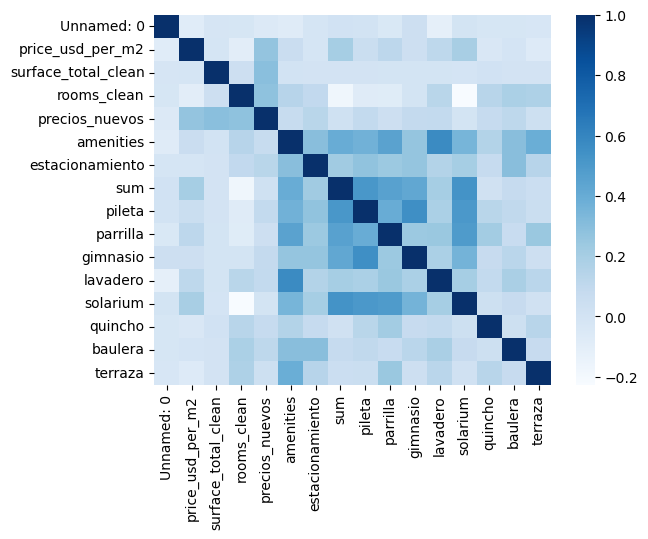

In [18]:
#se busca alguna tendencia de correlacion para poder llenar las columnas faltantes

correlation1=properatti_df_bsas.select_dtypes("number").corr()
sns.heatmap(correlation1, cmap="Blues")

In [19]:
print(correlation1.price_usd_per_m2)

Unnamed: 0            -0.084241
price_usd_per_m2       1.000000
surface_total_clean   -0.014022
rooms_clean           -0.096318
precios_nuevos         0.265895
amenities              0.058916
estacionamiento       -0.012220
sum                    0.201134
pileta                 0.056289
parrilla               0.116410
gimnasio               0.040058
lavadero               0.110827
solarium               0.197661
quincho               -0.035323
baulera               -0.006090
terraza               -0.064269
Name: price_usd_per_m2, dtype: float64


In [20]:
print(correlation1.precios_nuevos)


Unnamed: 0            -0.057351
price_usd_per_m2       0.265895
surface_total_clean    0.291480
rooms_clean            0.277779
precios_nuevos         1.000000
amenities              0.071491
estacionamiento        0.131545
sum                    0.027701
pileta                 0.093850
parrilla               0.039300
gimnasio               0.086107
lavadero               0.092133
solarium              -0.003342
quincho                0.080883
baulera                0.110101
terraza                0.036478
Name: precios_nuevos, dtype: float64


In [21]:
print(correlation1.surface_total_clean)

Unnamed: 0            -0.018334
price_usd_per_m2      -0.014022
surface_total_clean    1.000000
rooms_clean            0.041144
precios_nuevos         0.291480
amenities              0.005622
estacionamiento        0.001009
sum                    0.001545
pileta                 0.002010
parrilla              -0.002100
gimnasio              -0.002546
lavadero              -0.000703
solarium              -0.009678
quincho                0.012897
baulera                0.000815
terraza               -0.000585
Name: surface_total_clean, dtype: float64


In [22]:
print(properatti_df_bsas.shape)
print(properatti_df_bsas.isna().sum())


(31942, 17)
Unnamed: 0                0
barrio                 1294
price_usd_per_m2       6618
surface_total_clean    3912
rooms_clean            5901
precios_nuevos         2899
amenities                 0
estacionamiento           0
sum                       0
pileta                    0
parrilla                  0
gimnasio                  0
lavadero                  0
solarium                  0
quincho                   0
baulera                   0
terraza                   0
dtype: int64


In [23]:
#Una vez ya terminada de limpiar la columna price-USD_per_m2 se procede a evaluar los métodos de regresión lineal múltiple

In [24]:
#se saca los nulos para poder realizar las regresiones lineales
#primero se evalua la cantidad de nulos que quedan si se toma solo los valores no nulos de price por m2
properatti_no_nulos=properatti_df_bsas[properatti_df_bsas["price_usd_per_m2"].notnull()]
properatti_no_nulos.sample(2)
properatti_no_nulos.isnull().sum()
properatti_no_nulos=properatti_no_nulos[properatti_no_nulos["barrio"].notnull()]
properatti_no_nulos.isnull().sum()
properatti_no_nulos=properatti_no_nulos[properatti_no_nulos["rooms_clean"].notnull()]
properatti_no_nulos.isnull().sum()
properatti_no_nulos.shape

(20830, 17)

In [25]:
##regresión lineal múltiple simple
#feature_cols=["surface_total_clean", "rooms_clean", "precios_nuevos"]
#X=properatti_no_nulos[feature_cols]
#y=properatti_no_nulos.price_usd_per_m2
#linreg=LinearRegression()
#linreg.fit(X,y)
#y_pred=linreg.predict(X)
#print(linreg.coef_)
#print(linreg.intercept_)
#print(linreg.score(X,y))




In [26]:
#list(zip(feature_cols, linreg.coef_))

In [27]:
#se separa el dataset en datos de entrenamiento y datos de testeo y aplicamos el modelo

def train_test_error(feature_cols):
    X = properatti_no_nulos[feature_cols]
    y = properatti_no_nulos.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8972)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    

    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    return 

In [28]:
train_test_error(["surface_total_clean", "rooms_clean", "precios_nuevos"])

['surface_total_clean', 'rooms_clean', 'precios_nuevos']
MAE: 1247.579538850002
MSE: 10060101.827512087
RMSE: 3171.766357648698
R2: 0.24025650911301355



In [29]:
#que ocurre si a este modelo le agregamos los amenities
train_test_error(["surface_total_clean", "rooms_clean", "precios_nuevos", 'amenities', 'estacionamiento', 'sum', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza'])


['surface_total_clean', 'rooms_clean', 'precios_nuevos', 'amenities', 'estacionamiento', 'sum', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 1395.2002171665622
MSE: 9180985.071964199
RMSE: 3030.0140382454006
R2: 0.3066478085460502



In [30]:
#se observa que hay una mejora en el r2


In [31]:
# Filtrado de nulls en filas con valores numericos. 
# Me quedo solo con las filas que tengan las tres columnas numericas con valores no nulos

numericos = ["surface_total_clean", "rooms_clean", "precios_nuevos" ]
no_numericos = ["estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]

mask = properatti_df_bsas.notna().all(axis=1)

properatti_no_nulls = properatti_df_bsas[mask]

print(properatti_no_nulls.shape)


(20830, 17)


In [32]:
# Normalizo usando preprocessing.scale
# metodo scale

scaler = StandardScaler()

normalized_values = scaler.fit_transform(properatti_no_nulls[numericos])

# Creo nuevas columnas
normalized_columns = [f"{col}_normalized" for col in numericos]

# Las lleno con valores normalizados
properatti_no_nulls[normalized_columns] = normalized_values

properatti_no_nulls

C:\Users\inesh\AppData\Local\Temp\ipykernel_17952\3804696940.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properatti_no_nulls[normalized_columns] = normalized_values
C:\Users\inesh\AppData\Local\Temp\ipykernel_17952\3804696940.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properatti_no_nulls[normalized_columns] = normalized_values
C:\Users\inesh\AppData\Local\Temp\ipykernel_17952\3804696940.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza,surface_total_clean_normalized,rooms_clean_normalized,precios_nuevos_normalized
0,0,Mataderos,1127.272727,55.0,2.0,62000.0,1,0,0,0,0,0,1,0,0,0,1,-0.035269,-0.426815,-0.415623
1,2,Mataderos,1309.090909,55.0,2.0,72000.0,1,0,0,0,0,0,1,0,0,0,0,-0.035269,-0.426815,-0.393181
3,7,Belgrano,3066.666667,45.0,1.0,138000.0,1,0,0,1,0,0,1,1,0,0,0,-0.042422,-1.088758,-0.245066
4,8,Belgrano,3000.000000,65.0,2.0,195000.0,1,0,0,1,0,0,1,1,0,0,0,-0.028115,-0.426815,-0.117148
5,13,Palermo,2234.000000,50.0,1.0,111700.0,1,0,1,1,0,1,0,1,0,0,1,-0.038846,-1.088758,-0.304088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31926,121138,Saavedra,3014.492754,69.0,2.0,208000.0,1,0,1,1,1,1,1,0,1,0,1,-0.025254,-0.426815,-0.087973
31934,121153,Barrio Norte,1813.186813,91.0,3.0,165000.0,1,0,1,0,1,0,1,0,0,0,1,-0.009516,0.235128,-0.184473
31936,121158,Recoleta,3750.000000,44.0,1.0,165000.0,1,0,0,0,1,0,1,1,0,0,0,-0.043138,-1.088758,-0.184473
31939,121215,Belgrano,7699.115044,113.0,3.0,870000.0,1,1,1,1,1,0,0,0,1,0,1,0.006221,0.235128,1.397672


In [33]:
# Regresion con nuevos datos normalizados 

def train_test_error(feature_cols):
    X = properatti_no_nulls[feature_cols]
    y = properatti_no_nulls.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8972)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    return 

In [34]:
# Regresion con todos los features
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
print(train_test_error(features))
print

['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized', 'estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 1395.200217167865
MSE: 9180985.071967063
RMSE: 3030.014038245873
R2: 0.30664780854583396

None


<function print>

In [35]:
# Regresion con los features numericos
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized"]
train_test_error(features)

['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized']
MAE: 1247.5795388475424
MSE: 10060101.827512894
RMSE: 3171.766357648825
R2: 0.2402565091129527



In [36]:
#Regresión Lasso

In [37]:
def train_test_error_lasso(feature_cols):
    X = properatti_no_nulls[feature_cols]
    y = properatti_no_nulls.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8972)
    lm_lasso = linear_model.LassoCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 15, 25], cv=5)
    
    lm_lasso.fit(X_train, y_train)
    y_pred = lm_lasso.predict(X_test)
    print("Alpha :", lm_lasso.alpha_)
    
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    return 

In [38]:
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_lasso(features)

Alpha : 25.0
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized', 'estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 1339.3537650616322
MSE: 9130431.071871055
RMSE: 3021.660317089109
R2: 0.31046566975338197



In [39]:
numericos = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized"]
train_test_error_lasso(numericos)

Alpha : 25.0
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized']
MAE: 1234.8513467683008
MSE: 10025868.250469036
RMSE: 3166.3651479999958
R2: 0.24284184450764235



In [40]:
#Regresión Ridge



In [41]:
def train_test_error_ridge(feature_cols):
    X = properatti_no_nulls[feature_cols]
    y = properatti_no_nulls.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=8972)
    lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 15, 25])
    
    lm_ridge.fit(X_train, y_train)
    y_pred = lm_ridge.predict(X_test)
    
    print("Alpha :", lm_ridge.alpha_)
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    return 

In [42]:
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_ridge(features)

Alpha : 25.0
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized', 'estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 1391.1210951650123
MSE: 9171931.163231654
RMSE: 3028.5196323008463
R2: 0.3073315638742342



In [43]:
#Regresion Ridge. Sólo campos númericos. Es decir, sin amenities

In [44]:
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized"]
train_test_error_ridge(features)

Alpha : 25.0
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized']
MAE: 1245.9290495903751
MSE: 10054067.716009729
RMSE: 3170.8149923970223
R2: 0.24071220797330406



In [45]:

#Filtro por el barrio con mayor cantidad de campos no nulos

barrios_con_mas_propiedades=properatti_no_nulls.groupby(by="barrio",sort=True).size()
barrios_con_mas_propiedades.sort_values(ascending=False).head(5)

barrio
Palermo          2592
Belgrano         1823
Caballito        1598
Villa Urquiza    1115
Recoleta         1068
dtype: int64

In [46]:
#El barrio con mayor propiedades es Palermo. Filtro el dataframe de acuerdo a ese barrio

In [47]:
palermo=properatti_no_nulls["barrio"]=="Palermo"
properatti_palermo=properatti_no_nulls[palermo]
properatti_palermo.shape


(2592, 20)

In [48]:
properatti_palermo = properatti_palermo[properatti_palermo['surface_total_clean'] >= 20]
properatti_palermo = properatti_palermo[properatti_palermo['surface_total_clean'] <= 1000]

In [49]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = properatti_palermo['price_usd_per_m2'].quantile(0.25)
Q3 = properatti_palermo['price_usd_per_m2'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
properatti_palermo = properatti_palermo[(properatti_palermo['price_usd_per_m2'] >= lower_bound) & 
                                        (properatti_palermo['price_usd_per_m2'] <= upper_bound)]
properatti_palermo.shape

(2414, 20)

<Axes: >

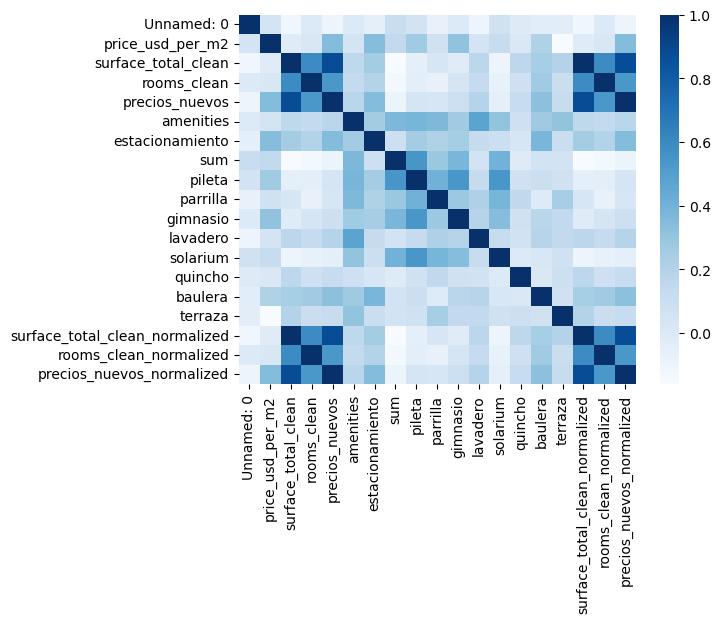

In [50]:
#heat map con el barrio palermo
correlation1=properatti_palermo.select_dtypes("number").corr()
sns.heatmap(correlation1, cmap="Blues")

In [51]:
def plots(y_test, y_pred, title):
    #definimos los residuales para los gráficos
    residuales = y_test - y_pred

    #graficamos el scatter de predicciones vs actuales
    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color='red', linestyle='-')  #diagonal de pendiente 1
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values '+ title)
    plt.show()

    #graficamos el scatter de residuales
    plt.figure(figsize=(10, 6))
    plt.scatter(np.arange(len(residuales)), residuales)
    plt.axhline(y=0, color='r')
    plt.title('Scatter de Residuales '+ title)
    plt.xlabel('Índice de muestra')
    plt.ylabel('Residuales')
    plt.show()

    #graficamos el histograma de residuales y superponemos el gráfico de la función normal
    plt.figure(figsize=(10, 6))
    plt.hist(residuales, bins=30, edgecolor='black', alpha=0.7, label='Histograma de Residuales')
    mean, std_dev = np.mean(residuales), np.std(residuales)
    x = np.linspace(min(residuales), max(residuales), 100)
    y = norm.pdf(x, mean, std_dev)
    y = y * len(residuales) * np.diff(np.histogram(residuales, bins=30)[1])[0]
    plt.plot(x, y, 'r--', label='Distribución Normal')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.title('Histograma de Residuales '+ title)
    plt.xlabel('Residuales')
    plt.ylabel('Frecuencia')
    plt.show()

    stats.probplot(residuales, dist="norm", plot=plt)
    plt.title('QQ Plot ' + title)
    plt.show()
    return

In [52]:
#Palermo tiene 2592 campos no nulos
#Se realiza una regresión Lineal Múltiple sobre el df Palermo
def train_test_error_palermo(feature_cols):
    X = properatti_palermo[feature_cols]
    y = properatti_palermo.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8972)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()

    plots(y_test, y_pred, 'Multilineal')
    return 

['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized']
MAE: 396.80439926692526
MSE: 310165.2401866066
RMSE: 556.9248065821872
R2: 0.5726795990584137



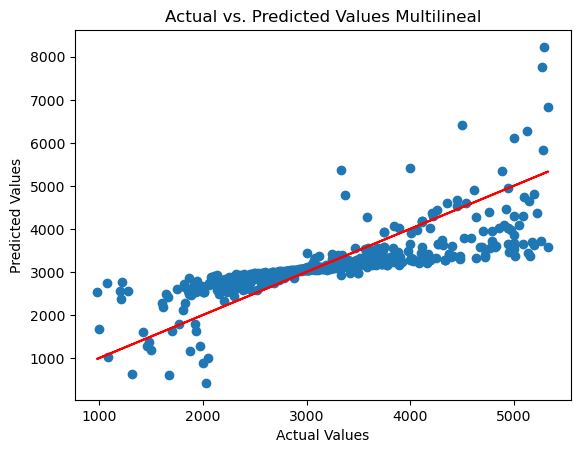

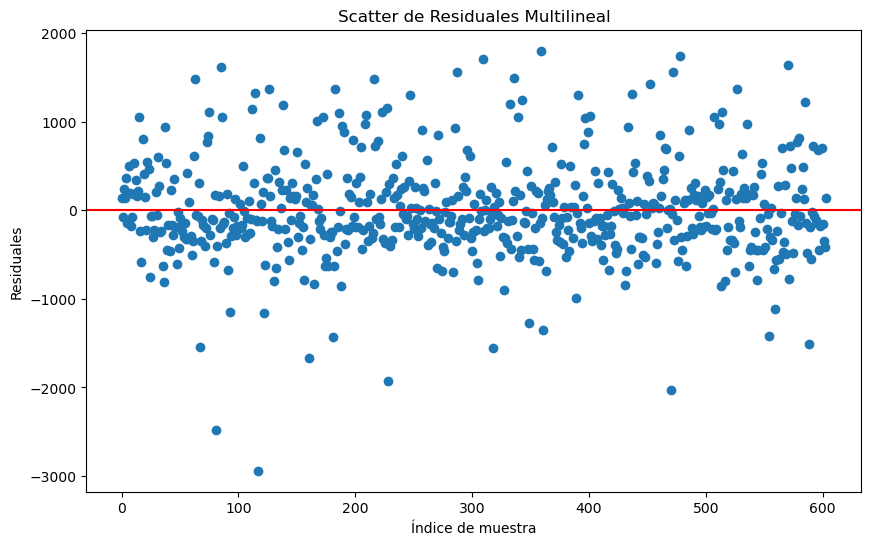

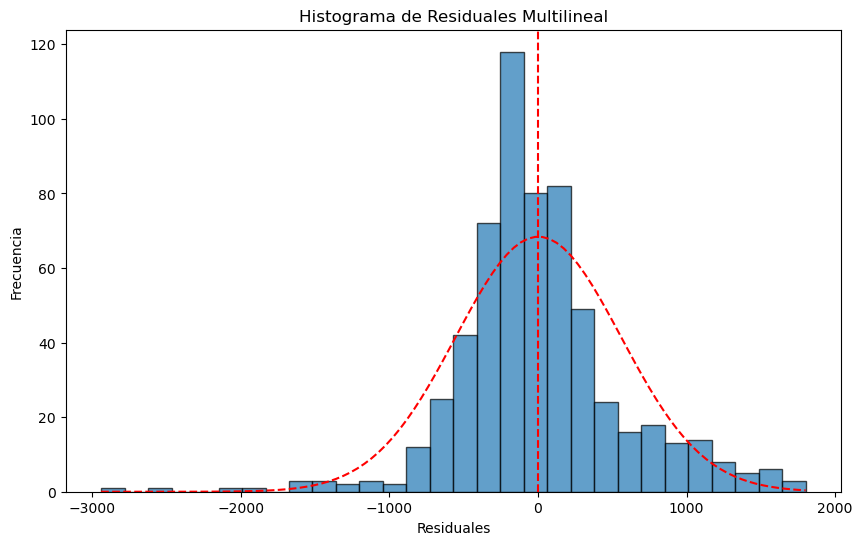

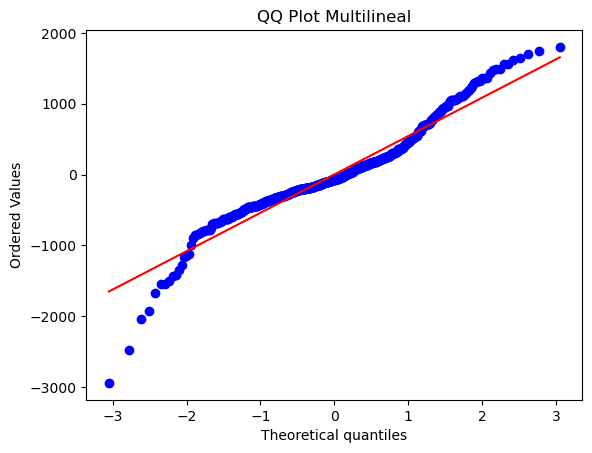

In [53]:
#Pruebo sin amenities
train_test_error_palermo(["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized"])

['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized', 'estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 368.75465067171535
MSE: 264488.23924211005
RMSE: 514.2842008482372
R2: 0.6356096499747199



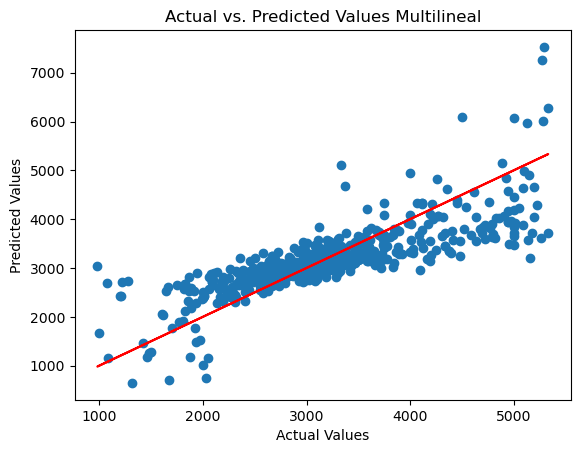

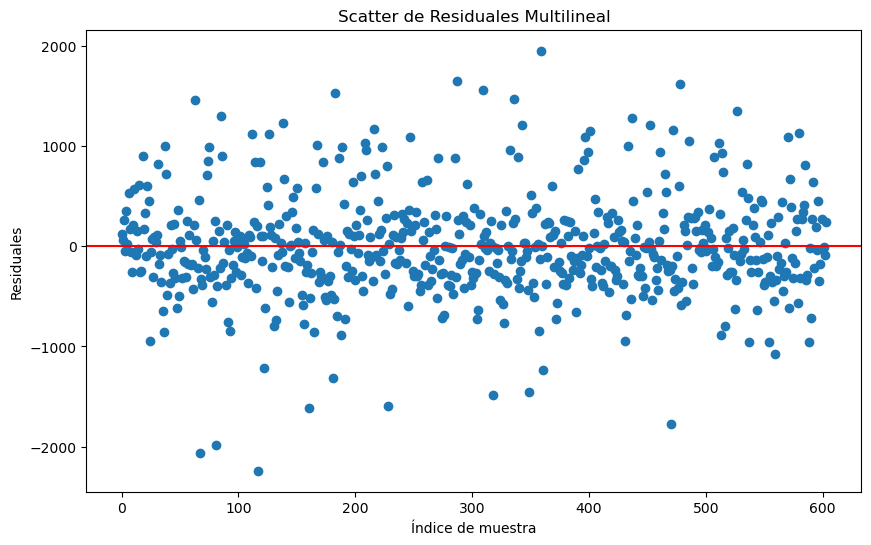

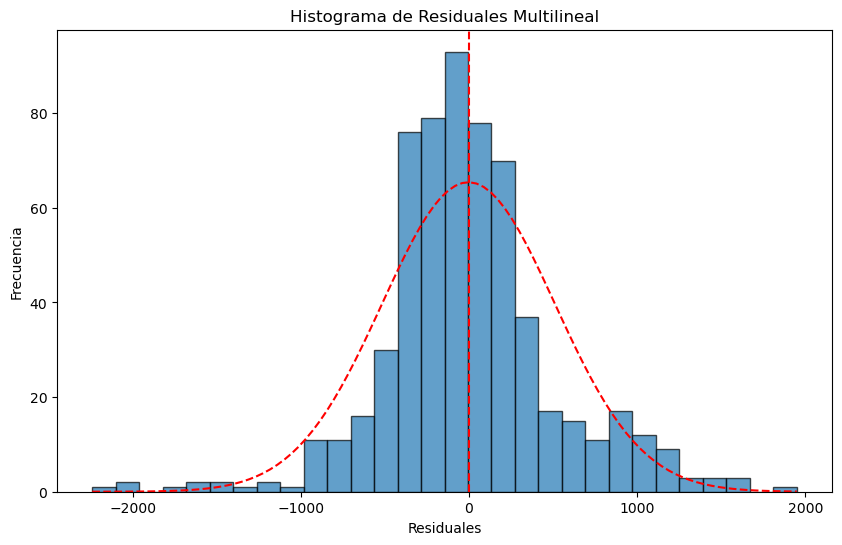

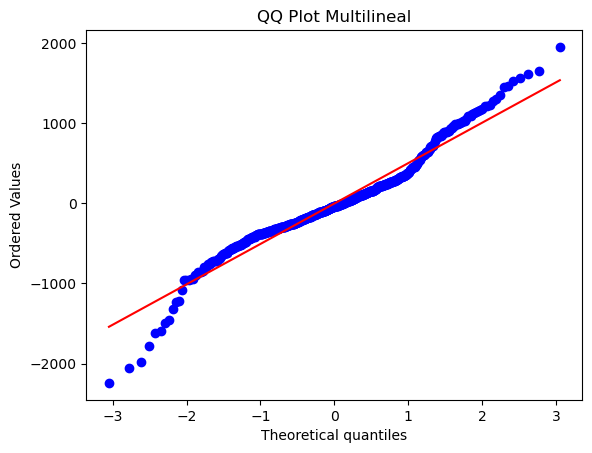

In [54]:
#Pruebo los valores con amenities
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_palermo(features)

In [55]:
def train_test_error_lasso_palermo(feature_cols):
    from sklearn.model_selection import cross_val_score
    X = properatti_palermo[feature_cols]
    y = properatti_palermo.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8972)
    lm_lasso = linear_model.LassoCV(alphas=np.linspace(0, 5, 100), cv=5)
    
    lm_lasso.fit(X_train, y_train)
    y_pred = lm_lasso.predict(X_test)
    
    print("Alpha :", lm_lasso.alpha_)
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()

    plots(y_test, y_pred, 'Lasso')
    return 

C:\Users\inesh\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\inesh\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200026019.4385103, tolerance: 93603.9786133424
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\inesh\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\inesh\anaconda3\envs\dhdsblend2021\lib\site-packa

Alpha : 0.25252525252525254
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized']
MAE: 398.6797242844173
MSE: 311493.5279601565
RMSE: 558.1160524121811
R2: 0.5708495923703087



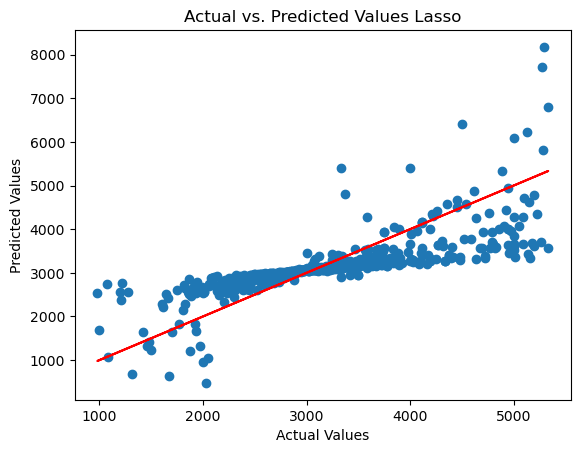

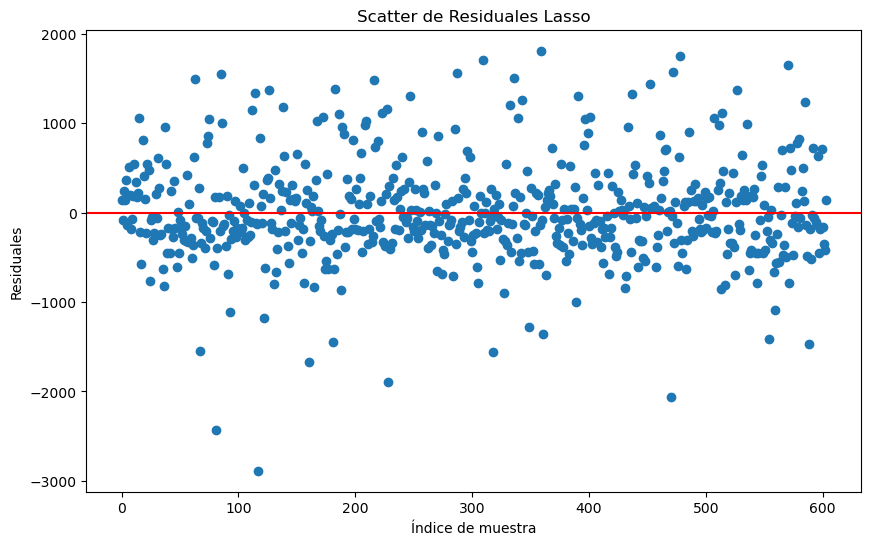

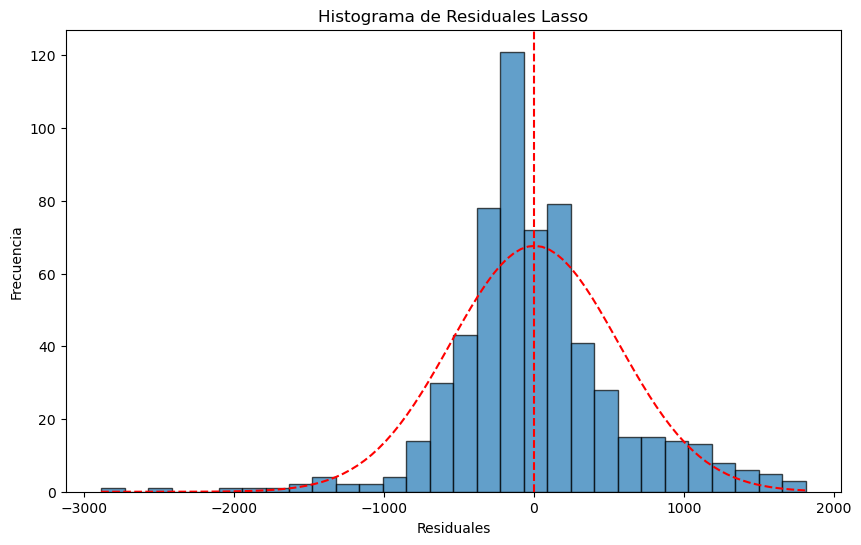

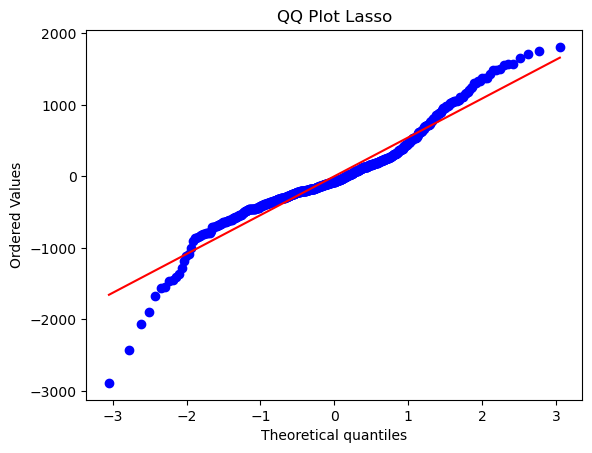

In [56]:
#Pruebo con los valores normalizados sin amenities

features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized"]
train_test_error_lasso_palermo(features)

C:\Users\inesh\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\inesh\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172478204.7900772, tolerance: 93603.9786133424
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\inesh\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\inesh\anaconda3\envs\dhdsblend2021\lib\site-packa

Alpha : 0.5555555555555556
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized', 'estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 373.10933229114255
MSE: 267771.3800650597
RMSE: 517.4663081448489
R2: 0.6310864060033241



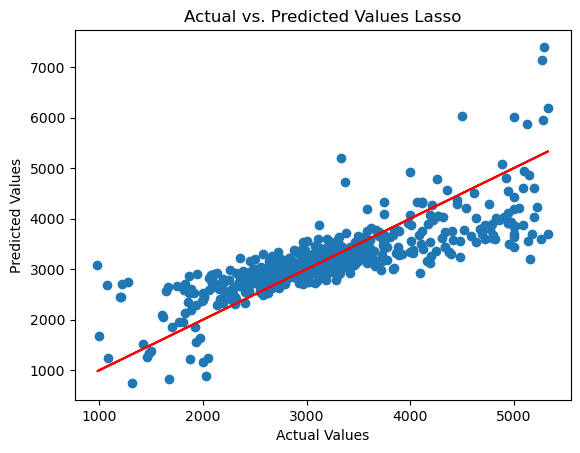

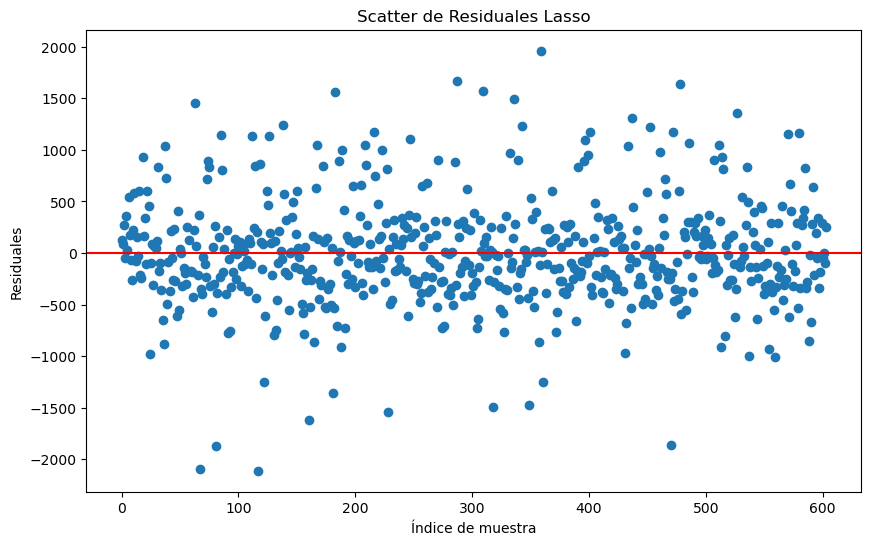

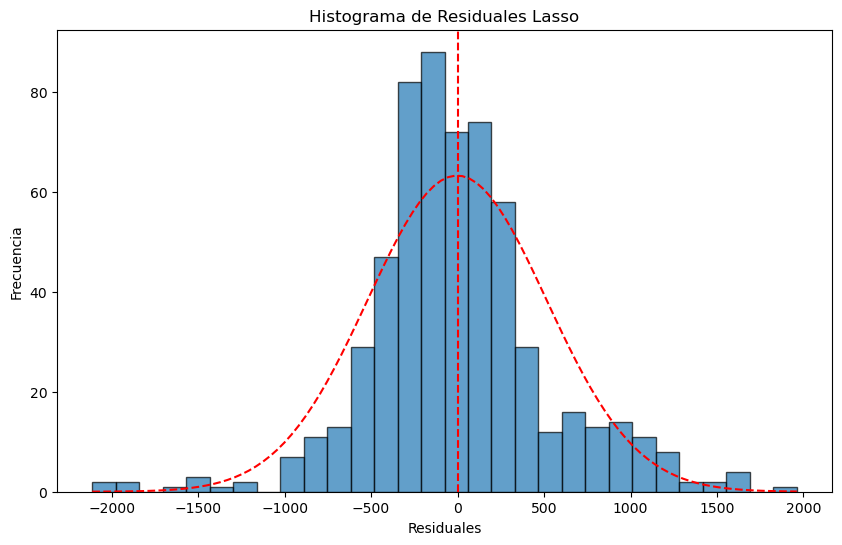

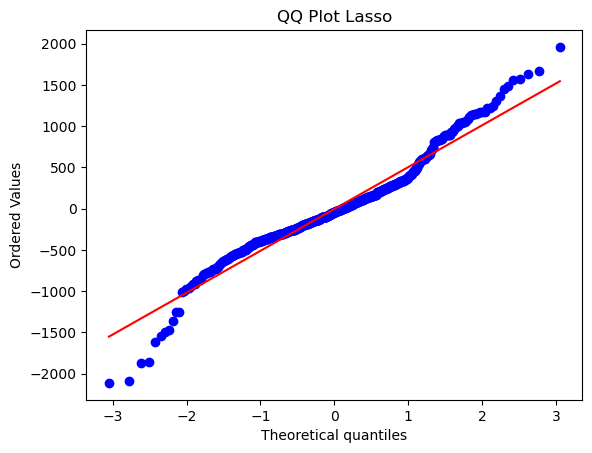

In [57]:
#Pruebo con los valores normalizados con amenities

features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_lasso_palermo(features)

In [58]:
#Hago la regresión lineal con Ridge
def train_test_error_ridge_palermo(feature_cols):
    X = properatti_palermo[feature_cols]
    y = properatti_palermo.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8972)
    lm_ridge = linear_model.RidgeCV(alphas=np.linspace(0.01, 5, 100))
    
    lm_ridge.fit(X_train, y_train)
    y_pred = lm_ridge.predict(X_test)
    print("Alpha :", lm_ridge.alpha_)
    
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()

    plots(y_test, y_pred, 'Ridge')
    return 

Alpha : 0.06040404040404041
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized']
MAE: 401.5375969511926
MSE: 314216.2293603598
RMSE: 560.5499347608202
R2: 0.5670984761805027



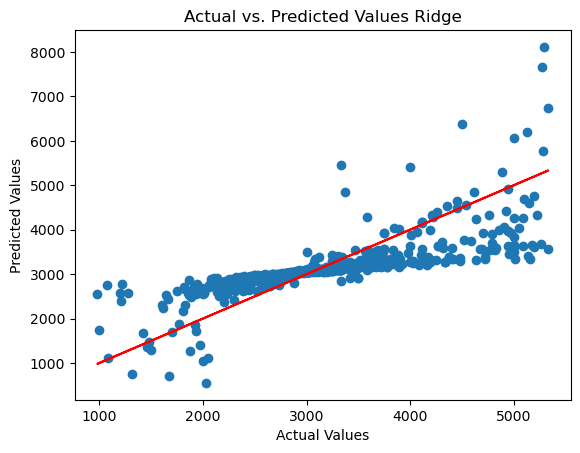

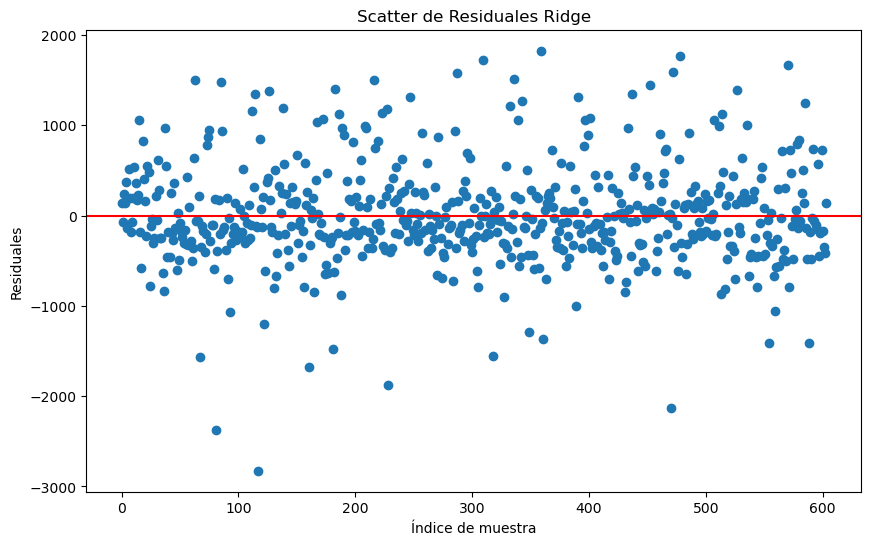

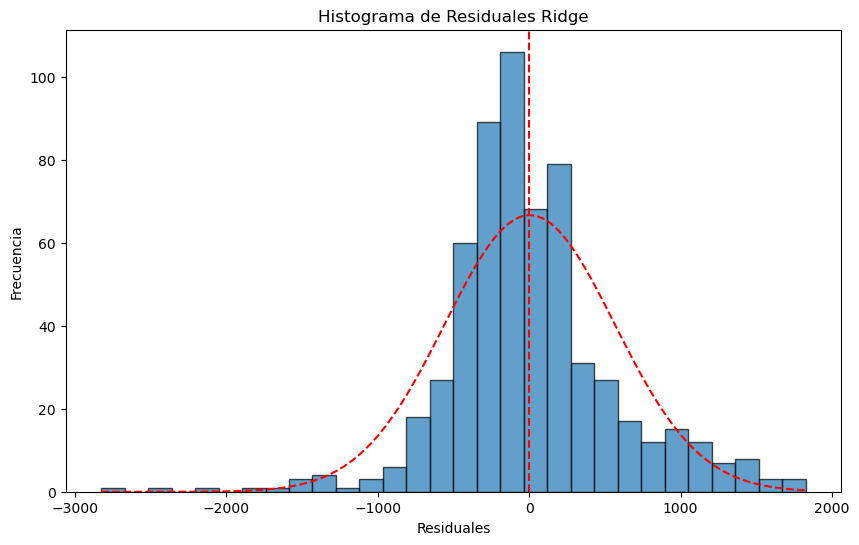

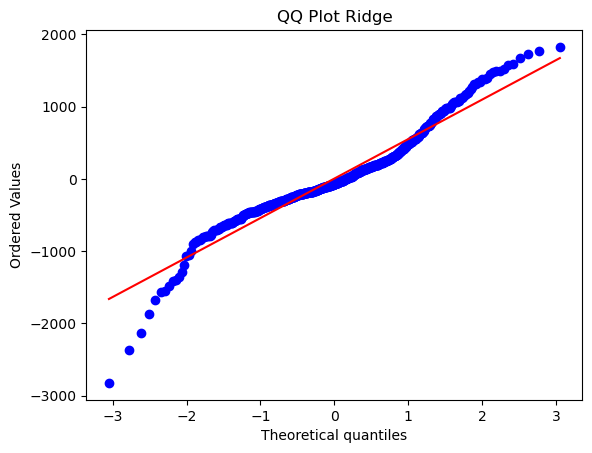

In [59]:
#Pruebo con los valores normalizados sin amenities

features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized"]
train_test_error_ridge_palermo(features)

Alpha : 0.11080808080808081
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized', 'estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 376.4682027085983
MSE: 270851.6668351724
RMSE: 520.4341138272667
R2: 0.6268426378208299



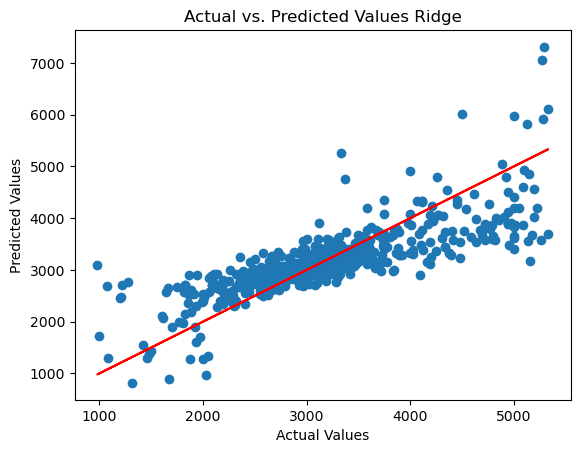

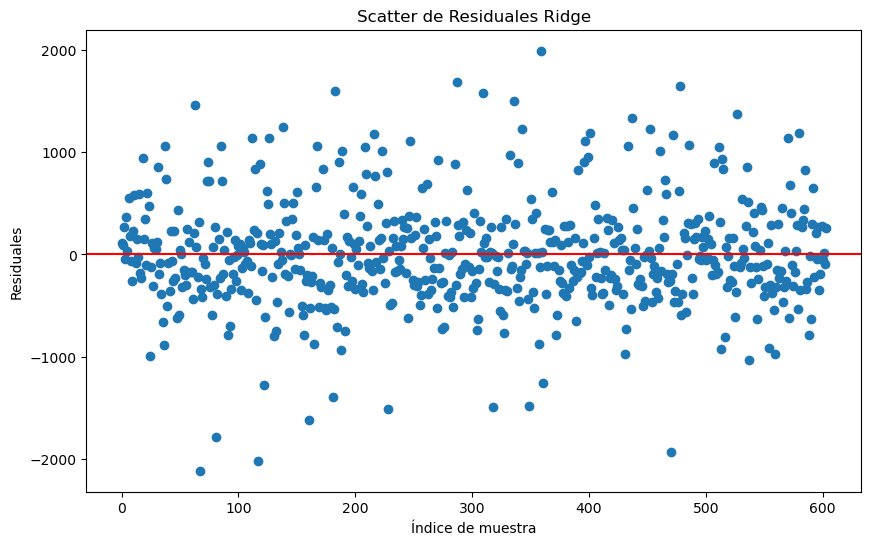

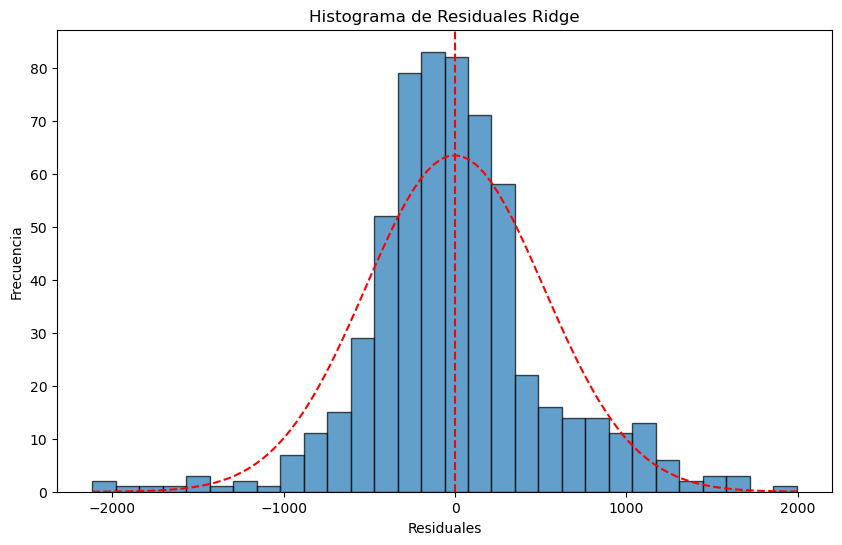

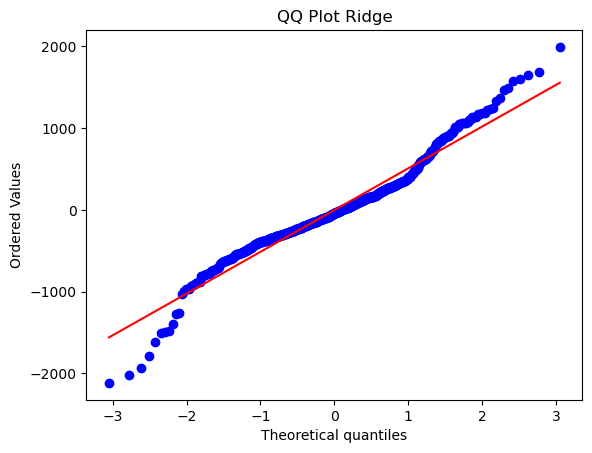

In [60]:
#Pruebo con los valores normalizados con amenities

features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_ridge_palermo(features)
